# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('/Users/arjunkhanchandani/Desktop/Uni/6th Semester/AI Applications (UCS655)/NLP in Python/dtm.pkl')
data = data.transpose()
data.head()

,brennan,burnham,burr,carlin,dave,hasan,louis,murphy,norm,pete,ricky,rock,taylor,trevor,vir
aaaah,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
aah,3,0,0,0,2,0,0,1,0,0,0,0,0,0,0
aall,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
aand,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0
aarrives,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'brennan': [('like', 167),
  ('know', 71),
  ('im', 68),
  ('right', 64),
  ('dont', 54),
  ('just', 53),
  ('people', 43),
  ('yeah', 41),
  ('youre', 35),
  ('going', 32),
  ('got', 28),
  ('think', 26),
  ('cause', 26),
  ('women', 24),
  ('say', 23),
  ('thats', 23),
  ('ive', 22),
  ('good', 21),
  ('theres', 21),
  ('theyre', 21),
  ('guys', 20),
  ('white', 20),
  ('shit', 19),
  ('way', 18),
  ('liberal', 17),
  ('uh', 16),
  ('did', 16),
  ('life', 15),
  ('thing', 15),
  ('lot', 15)],
 'burnham': [('im', 94),
  ('um', 56),
  ('like', 50),
  ('just', 48),
  ('white', 42),
  ('dont', 42),
  ('yeah', 41),
  ('know', 38),
  ('world', 34),
  ('time', 34),
  ('feeling', 34),
  ('gonna', 28),
  ('say', 27),
  ('shit', 26),
  ('thats', 26),
  ('uh', 26),
  ('turning', 24),
  ('day', 23),
  ('ive', 22),
  ('right', 22),
  ('look', 21),
  ('funny', 21),
  ('eyes', 20),
  ('oh', 20),
  ('tell', 20),
  ('youre', 20),
  ('fucking', 19),
  ('really', 19),
  ('got', 19),
  ('ill', 18)],
 '

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('-----------------------')

brennan
like, know, im, right, dont, just, people, yeah, youre, going, got, think, cause, women
-----------------------
burnham
im, um, like, just, white, dont, yeah, know, world, time, feeling, gonna, say, shit
-----------------------
burr
like, fcking, just, right, know, im, gonna, dont, yeah, youre, sht, fck, thats, shes
-----------------------
carlin
dont, say, like, know, people, got, little, im, thats, want, think, theyre, dog, things
-----------------------
dave
like, know, im, dont, just, said, got, thats, shit, say, right, uh, gonna, fuck
-----------------------
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
-----------------------
louis
like, just, dont, im, know, thats, people, theyre, going, fucking, got, way, want, youre
-----------------------
murphy
like, dont, shit, im, know, fuck, got, gonna, say, man, thats, right, said, just
-----------------------
norm
know, like, im, dont, just, thats, right, going, think, guy, good, love, 

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'know',
 'im',
 'right',
 'dont',
 'just',
 'people',
 'yeah',
 'youre',
 'going',
 'got',
 'think',
 'cause',
 'women',
 'say',
 'thats',
 'ive',
 'good',
 'theres',
 'theyre',
 'guys',
 'white',
 'shit',
 'way',
 'liberal',
 'uh',
 'did',
 'life',
 'thing',
 'lot',
 'im',
 'um',
 'like',
 'just',
 'white',
 'dont',
 'yeah',
 'know',
 'world',
 'time',
 'feeling',
 'gonna',
 'say',
 'shit',
 'thats',
 'uh',
 'turning',
 'day',
 'ive',
 'right',
 'look',
 'funny',
 'eyes',
 'oh',
 'tell',
 'youre',
 'fucking',
 'really',
 'got',
 'ill',
 'like',
 'fcking',
 'just',
 'right',
 'know',
 'im',
 'gonna',
 'dont',
 'yeah',
 'youre',
 'sht',
 'fck',
 'thats',
 'shes',
 'did',
 'got',
 'thing',
 'think',
 'people',
 'hes',
 'going',
 'gotta',
 'doing',
 'man',
 'look',
 'wife',
 'tell',
 'guy',
 'thank',
 'theyre',
 'dont',
 'say',
 'like',
 'know',
 'people',
 'got',
 'little',
 'im',
 'thats',
 'want',
 'think',
 'theyre',
 'dog',
 'things',
 'lot',
 'good',
 'shit',
 'just',
 'ri

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 15),
 ('know', 15),
 ('im', 15),
 ('right', 15),
 ('dont', 15),
 ('just', 15),
 ('got', 15),
 ('thats', 15),
 ('people', 13),
 ('youre', 13),
 ('think', 11),
 ('going', 9),
 ('say', 9),
 ('shit', 9),
 ('thing', 9),
 ('yeah', 8),
 ('good', 7),
 ('did', 7),
 ('time', 7),
 ('fucking', 7),
 ('hes', 7),
 ('man', 7),
 ('fuck', 7),
 ('cause', 6),
 ('theres', 6),
 ('theyre', 6),
 ('uh', 6),
 ('gonna', 6),
 ('oh', 6),
 ('want', 6),
 ('ive', 5),
 ('white', 5),
 ('life', 5),
 ('okay', 5),
 ('look', 4),
 ('tell', 4),
 ('ill', 4),
 ('shes', 4),
 ('guy', 4),
 ('said', 4),
 ('didnt', 4),
 ('love', 4),
 ('guys', 3),
 ('um', 3),
 ('day', 3),
 ('really', 3),
 ('dad', 3),
 ('hey', 3),
 ('years', 3),
 ('women', 2),
 ('way', 2),
 ('lot', 2),
 ('world', 2),
 ('little', 2),
 ('things', 2),
 ('god', 2),
 ('mean', 2),
 ('school', 2),
 ('parents', 2),
 ('make', 2),
 ('motherfucker', 2),
 ('come', 2),
 ('house', 2),
 ('went', 2),
 ('need', 2),
 ('indian', 2),
 ('liberal', 1),
 ('feeling', 1),
 ('turnin

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'know',
 'im',
 'right',
 'dont',
 'just',
 'got',
 'thats',
 'people',
 'youre',
 'think',
 'going',
 'say',
 'shit',
 'thing',
 'yeah',
 'good',
 'did',
 'time',
 'fucking',
 'hes',
 'man',
 'fuck']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('/Users/arjunkhanchandani/Desktop/Uni/6th Semester/AI Applications (UCS655)/NLP in Python/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("/Users/arjunkhanchandani/Desktop/Uni/6th Semester/AI Applications (UCS655)/NLP in Python/pickle/cv_stop.pkl", "wb"))
data_stop.to_pickle("/Users/arjunkhanchandani/Desktop/Uni/6th Semester/AI Applications (UCS655)/NLP in Python/pickle/dtm_stop.pkl")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)

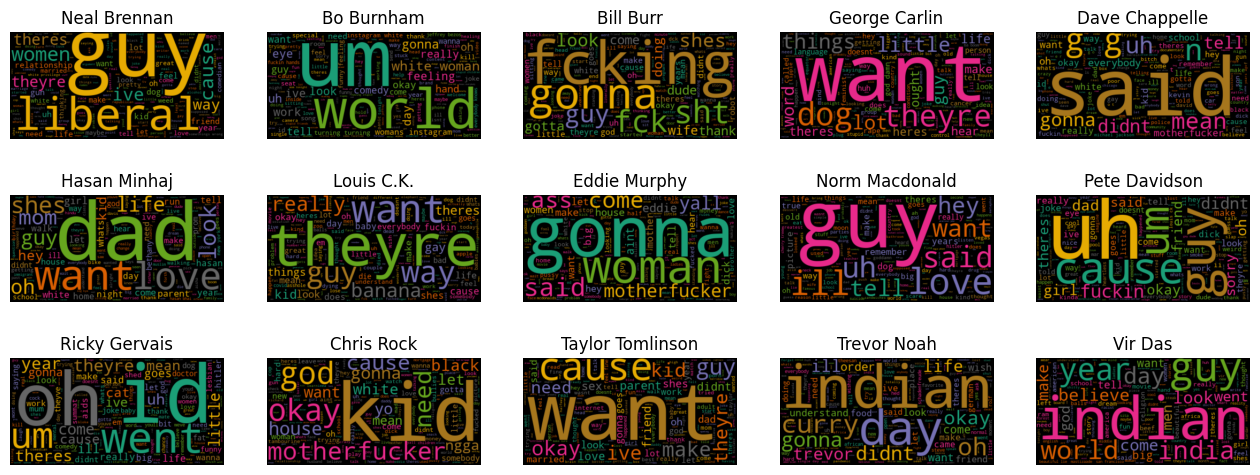

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Neal Brennan','Bo Burnham', 'Bill Burr', 'George Carlin', 'Dave Chappelle', 'Hasan Minhaj', 'Louis C.K.',
              'Eddie Murphy', 'Norm Macdonald', 'Pete Davidson', 'Ricky Gervais', 'Chris Rock', 'Taylor Tomlinson', 'Trevor Noah', 'Vir Das']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Dave Chappelle and Eddie Murphy use the N-word alot.
* Hasan Minhaj talks about his dad alot, which is adorable
* A lot of people use the F-word repeatedly 
* Bill Burr says the f-word alot, he's very funny and great to listen to
* Trevor Noah mentions Indians and Curry alot, we as Indians should watch his standup
* Chris Rock uses motherf-word
* Neal Brennan mentions liberals and makes his jokes about them
* Taylor Tomlinson talks about how she wants a guy
* Pete Davidson uses 'uh' alot which shows he is confused half the time he's on stage
* Bo Burnham talks about the world and critices it alot

## Number of Words

### Analysis

In [10]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')

data_unique_sort

,comedian,unique_words
9,Pete Davidson,1092
8,Norm Macdonald,1095
6,Louis C.K.,1187
4,Dave Chappelle,1276
13,Trevor Noah,1280
1,Bo Burnham,1302
14,Vir Das,1440
0,Neal Brennan,1442
2,Bill Burr,1473
12,Taylor Tomlinson,1482


In [11]:
data

,brennan,burnham,burr,carlin,dave,hasan,louis,murphy,norm,pete,ricky,rock,taylor,trevor,vir
aaaah,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
aah,3,0,0,0,2,0,0,1,0,0,0,0,0,0,0
aall,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
aand,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0
aarrives,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zucker,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
zuckerberg,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
zuckerfuck,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
zuckerfucker,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [62, 87, 67, 60, 66, 72, 63, 93, 61, 49, 64, 64, 61, 60, 67]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Bo Burnham,1302,3734,87,42.919540
8,Norm Macdonald,1095,3169,61,51.950820
14,Vir Das,1440,3702,67,55.253731
4,Dave Chappelle,1276,3657,66,55.409091
6,Louis C.K.,1187,3676,63,58.349206
0,Neal Brennan,1442,3806,62,61.387097
3,George Carlin,1524,3770,60,62.833333
5,Hasan Minhaj,1596,4816,72,66.888889
12,Taylor Tomlinson,1482,4137,61,67.819672
7,Eddie Murphy,1485,6475,93,69.623656


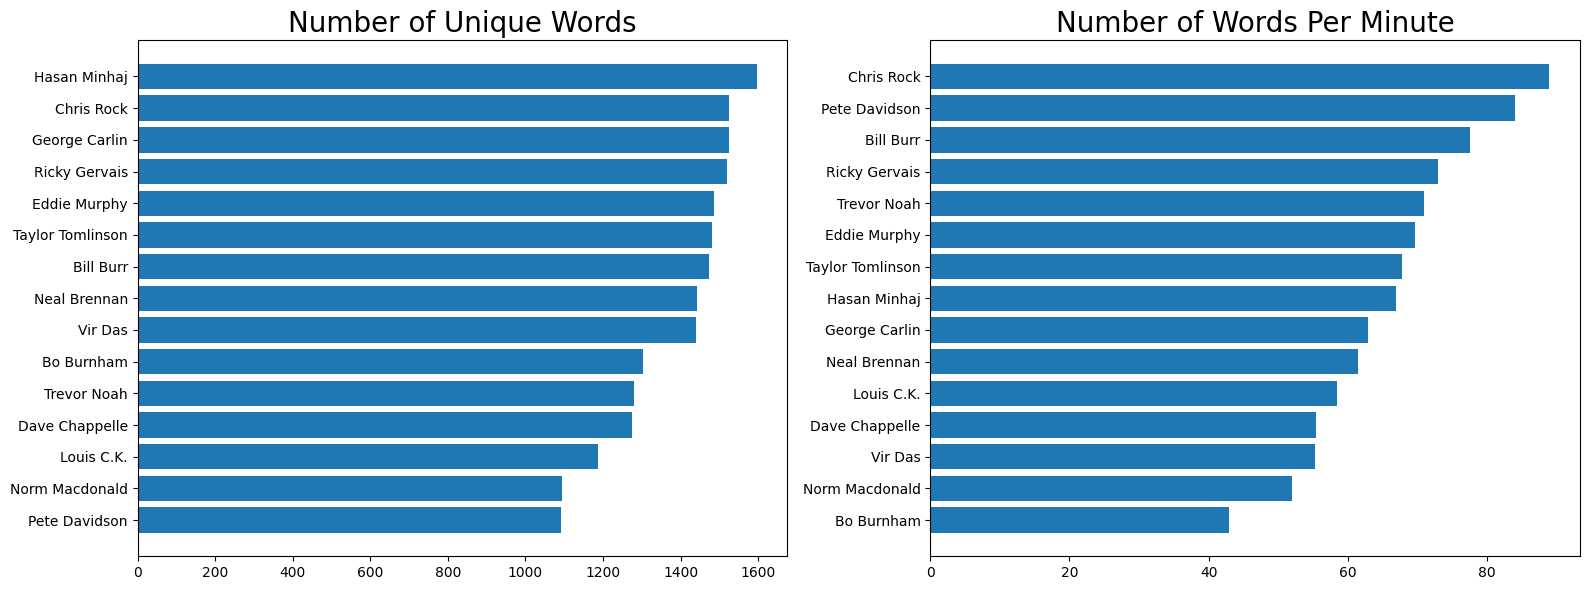

In [13]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Hasan Manhaj (Standup comedian), George Carlin and Chris Rock (standup) use a lot of unique words in their comedy
   * Louis C.K. (self-depricating comedy) and Pete Davidson (dumb) have a smaller vocabulary

*-*

* **Talking Speed**
   * Chris Rock (dark comedy) and Pete Davidson (podcast host) talk fast
   * Bo Burnham (musical comedy) and Norm Macdonald(slow speaker) talk slowly

*-*

Taylor Tomlinson is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [14]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 15),
 ('know', 15),
 ('im', 15),
 ('right', 15),
 ('dont', 15),
 ('just', 15),
 ('got', 15),
 ('thats', 15),
 ('people', 13),
 ('youre', 13),
 ('think', 11),
 ('going', 9),
 ('say', 9),
 ('shit', 9),
 ('thing', 9),
 ('yeah', 8),
 ('good', 7),
 ('did', 7),
 ('time', 7),
 ('fucking', 7),
 ('hes', 7),
 ('man', 7),
 ('fuck', 7),
 ('cause', 6),
 ('theres', 6),
 ('theyre', 6),
 ('uh', 6),
 ('gonna', 6),
 ('oh', 6),
 ('want', 6),
 ('ive', 5),
 ('white', 5),
 ('life', 5),
 ('okay', 5),
 ('look', 4),
 ('tell', 4),
 ('ill', 4),
 ('shes', 4),
 ('guy', 4),
 ('said', 4),
 ('didnt', 4),
 ('love', 4),
 ('guys', 3),
 ('um', 3),
 ('day', 3),
 ('really', 3),
 ('dad', 3),
 ('hey', 3),
 ('years', 3),
 ('women', 2),
 ('way', 2),
 ('lot', 2),
 ('world', 2),
 ('little', 2),
 ('things', 2),
 ('god', 2),
 ('mean', 2),
 ('school', 2),
 ('parents', 2),
 ('make', 2),
 ('motherfucker', 2),
 ('come', 2),
 ('house', 2),
 ('went', 2),
 ('need', 2),
 ('indian', 2),
 ('liberal', 1),
 ('feeling', 1),
 ('turnin

In [15]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'fucker', 'fucked', 'fuckin', 'fcking','shit', 'shitty', 'motherfucker', 'asshole', 'assholes', 'bitch', 'bastard', 'cunt']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fucker + data_bad_words.fucked + data_bad_words.fuckin + data_bad_words.fcking, data_bad_words.motherfucker, data_bad_words.shit + data_bad_words.shitty, data_bad_words.asshole + data_bad_words.assholes, data_bad_words.bitch, data_bad_words.bastard, data_bad_words.cunt], axis=1)
data_profanity.columns = ['f_word', 'm_word','s_word', 'a_word', 'b_word_1', 'b_word_2', 'c_word']

data_profanity

,f_word,m_word,s_word,a_word,b_word_1,b_word_2,c_word
brennan,32,0,19,0,1,0,0
burnham,46,0,29,0,1,0,0
burr,195,0,0,0,4,0,0
carlin,36,1,23,6,0,0,1
dave,48,12,34,0,9,0,0
hasan,28,0,17,0,0,0,0
louis,85,1,22,8,1,0,0
murphy,139,41,96,3,16,0,0
norm,33,1,5,0,0,0,0
pete,85,1,19,1,3,0,0


In [16]:
data_life_death = data.transpose()[['death', 'dead', 'deaths', 'life', 'lives']]
data_life_death = pd.concat([data_life_death.death + data_life_death.dead + data_life_death.deaths, data_life_death.life + data_life_death.lives], axis=1)
data_life_death.columns = ['death_count', 'life_count']

data_life_death

,death_count,life_count
brennan,4,16
burnham,6,3
burr,5,11
carlin,6,16
dave,4,15
hasan,2,28
louis,10,18
murphy,1,6
norm,3,12
pete,3,6


In [17]:
india_count = data.transpose()[['india', 'indian', 'indians']]
india_count = pd.concat([india_count.india + india_count.indian + india_count.indians], axis=1)
india_count.columns = ['count']

india_count

,count
brennan,0
burnham,0
burr,0
carlin,0
dave,0
hasan,12
louis,1
murphy,0
norm,0
pete,2


# Findings
* Trevor Noah has mentioned India and Indians more than Vir Das who is actually Indian, which is interesting and funny without context (haha?)

In [18]:
genital_count = data.transpose()[['dick', 'dicks', 'penis', 'vagina', 'vaginas', 'pussy']]
genital_count = pd.concat([genital_count.dick + genital_count.dicks + genital_count.penis, genital_count.vagina + genital_count.vaginas + genital_count.pussy], axis=1)
genital_count.columns = ['male_count', 'female_count']

genital_count

,male_count,female_count
brennan,1,1
burnham,6,2
burr,0,1
carlin,8,0
dave,9,4
hasan,3,0
louis,8,2
murphy,34,27
norm,0,0
pete,17,9


In [19]:
lgbt_count = data.transpose()[['lesbian', 'lesbians', 'gay', 'gays', 'trans', 'transgender', 'queer']]
lgbt_count = pd.concat([lgbt_count.lesbian + lgbt_count.lesbians, lgbt_count.gay + lgbt_count.gays, lgbt_count.trans + lgbt_count.transgender, lgbt_count.queer, lgbt_count.lesbian + lgbt_count.lesbians + lgbt_count.gay + lgbt_count.gays + lgbt_count.trans + lgbt_count.transgender + lgbt_count.queer], axis=1)
lgbt_count.columns = ['lesbian_count', 'gay_count', 'trans_count', 'queer_count', 'total_count']

lgbt_count

,lesbian_count,gay_count,trans_count,queer_count,total_count
brennan,0,7,2,0,9
burnham,0,0,0,0,0
burr,0,1,2,0,3
carlin,0,0,0,1,1
dave,0,10,1,0,11
hasan,0,0,0,0,0
louis,0,20,3,0,23
murphy,0,1,0,0,1
norm,0,1,0,0,1
pete,1,16,0,0,17


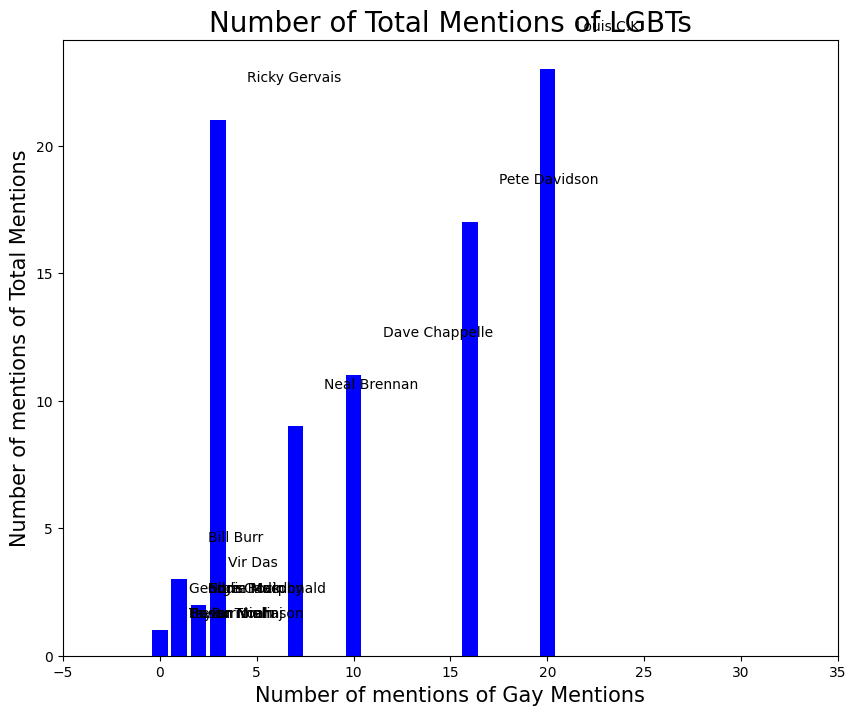

In [29]:
# Let's create a bar plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(lgbt_count.index):
    x = lgbt_count.gay_count.loc[comedian]
    y = lgbt_count.total_count.loc[comedian]
    plt.bar(x, y, color='blue')
    plt.text(x+1.5, y+1.5, full_names[i], fontsize=10)
    plt.xlim(-5, 35) 
    
plt.title('Number of Total Mentions of LGBTs', fontsize=20)
plt.xlabel('Number of mentions of Gay Mentions', fontsize=15)
plt.ylabel('Number of mentions of Total Mentions', fontsize=15)

plt.show()

In [20]:
racism_count = data.transpose()[['race', 'racism', 'racist', 'racists', 'white', 'whites', 'cracker', 'crackers','blacks', 'nigga']]
racism_count = pd.concat([racism_count.race + racism_count.racism + racism_count.racist + racism_count.racists,  racism_count.white + racism_count.whites + racism_count.cracker + racism_count.crackers, racism_count.blacks + racism_count.nigga], axis=1)
racism_count.columns = ['racism_count', 'white_count', 'black_count']

racism_count

,racism_count,white_count,black_count
brennan,6,20,0
burnham,2,42,0
burr,1,20,0
carlin,3,3,0
dave,2,25,0
hasan,11,20,0
louis,2,2,0
murphy,3,29,0
norm,0,0,0
pete,0,0,0


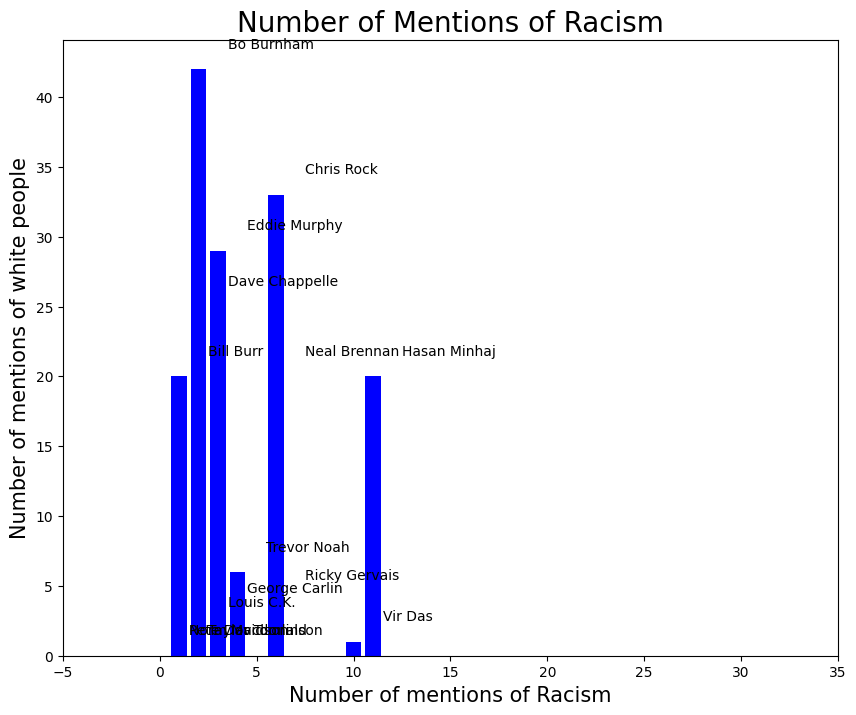

In [27]:
# Let's create a bar plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(racism_count.index):
    x = racism_count.racism_count.loc[comedian]
    y = racism_count.white_count.loc[comedian]
    plt.bar(x, y, color='blue')
    plt.text(x+1.5, y+1.5, full_names[i], fontsize=10)
    plt.xlim(-5, 35) 
    
plt.title('Number of Mentions of Racism', fontsize=20)
plt.xlabel('Number of mentions of Racism', fontsize=15)
plt.ylabel('Number of mentions of white people', fontsize=15)

plt.show()

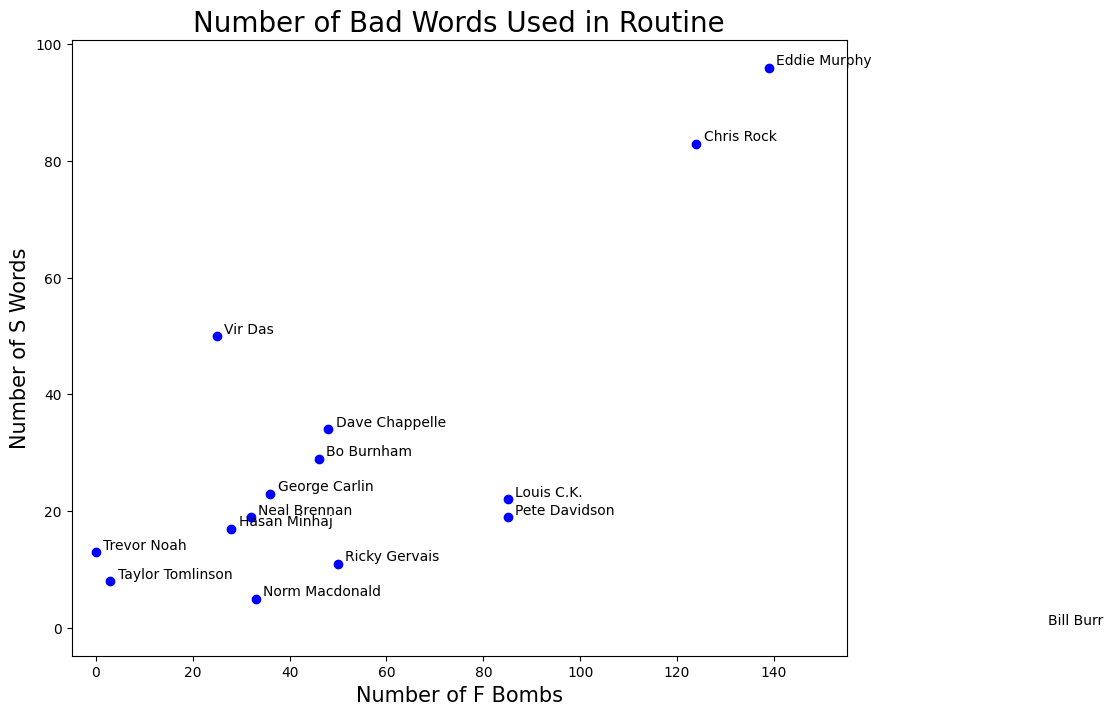

In [21]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

Number of Life vs Death Refernces in Routine

* X - 'Number of Life References'
* Y - 'Number of Death Refernces'

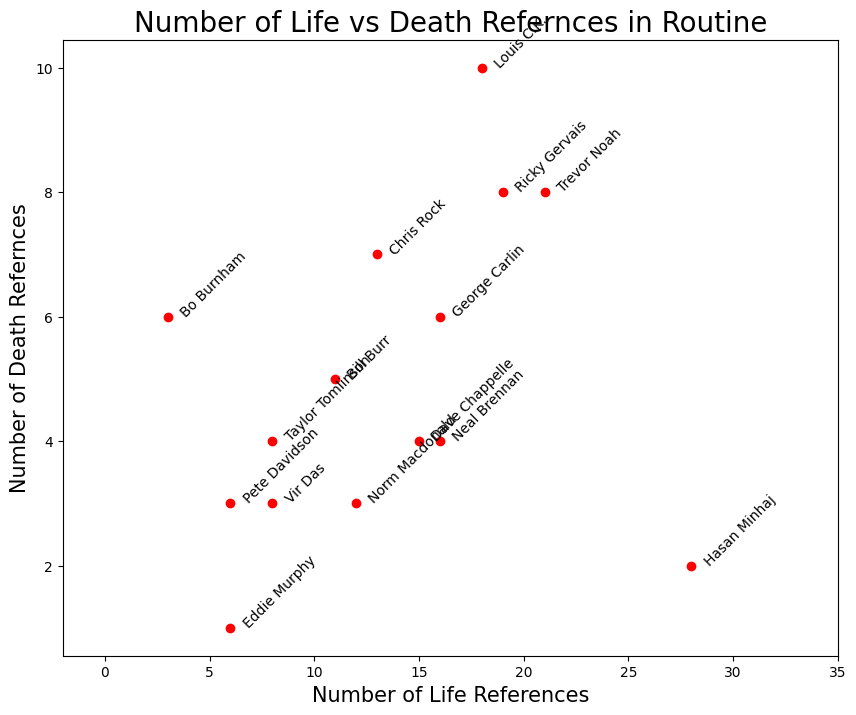

In [22]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_life_death.index):
    x = data_life_death.life_count.loc[comedian]
    y = data_life_death.death_count.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+0.5, y+0.005, full_names[i], fontsize=10, rotation=45)
    plt.xlim(-2, 35) 
    
plt.title('Number of Life vs Death Refernces in Routine', fontsize=20)

plt.xlabel('Number of Life References', fontsize=15)
plt.ylabel('Number of Death Refernces', fontsize=15)

plt.show()

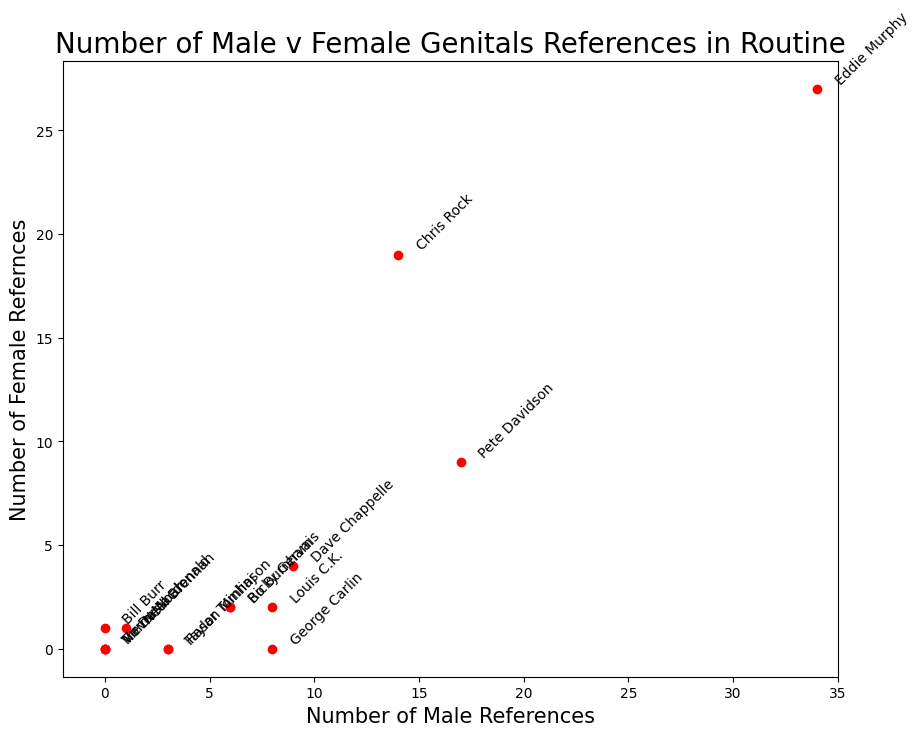

In [23]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_life_death.index):
    x = genital_count.male_count.loc[comedian]
    y = genital_count.female_count.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+0.75, y+0.25, full_names[i], fontsize=10, rotation=45)
    plt.xlim(-2, 35) 
    
plt.title('Number of Male v Female Genitals References in Routine', fontsize=20)

plt.xlabel('Number of Male References', fontsize=15)
plt.ylabel('Number of Female Refernces', fontsize=15)

plt.show()

## Side Note

What was our goal for the EDA portion of our journey? 
**To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.


## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

Number of Life vs Death Refernces in Routine

* X - 'Number of Life References'
* Y - 'Number of Death Refernces'